In [72]:
%cd final_project/plot_utils/

[Errno 2] No such file or directory: 'final_project/plot_utils/'
/teamspace/studios/this_studio/final_project/plot_utils


/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/IPython/core/magics/osm.py:393: UserWarning: using bookmarks requires you to install the `pickleshare` library.
  bkms = self.shell.db.get('bookmarks', {})


In [73]:
import pandas as pd
import numpy as np

# load data .csv

data = pd.read_csv('acrobot_v1_expected_reward.csv')
data.head()

# Replace the nan values with the previous value
data = data.ffill()
data = data.bfill()
# Rename the columns
data.columns = ['steps', 
    'DQN + PER', 'DQN + PER max', 'DQN + PER min', 
    'DQN + MICO + BPERcn (weight: 1_0)', 'DQN + MICO + BPERcn (weight: 1_0) max', 'DQN + MICO + BPERcn (weight: 1_0) min',
    'DQN', 'DQN max', 'DQN min',
    'DQN + MICO + BPERaa (weight: 1_0)', 'DQN + MICO + BPERaa (weight: 1_0) max', 'DQN + MICO + BPERaa (weight: 1_0) min',
]

data.head()

,steps,DQN + PER,DQN + PER max,DQN + PER min,DQN + MICO + BPERcn (weight: 1_0),DQN + MICO + BPERcn (weight: 1_0) max,DQN + MICO + BPERcn (weight: 1_0) min,DQN,DQN max,DQN min,DQN + MICO + BPERaa (weight: 1_0),DQN + MICO + BPERaa (weight: 1_0) max,DQN + MICO + BPERaa (weight: 1_0) min
0,256,-185.0,-185.0,-185.0,-266.0,-266.0,-266.0,-185.0,-185.0,-185.0,-266.0,-266.0,-266.0
1,384,-185.0,-185.0,-185.0,-266.0,-266.0,-266.0,-185.0,-185.0,-185.0,-266.0,-266.0,-266.0
2,512,-404.0,-406.0,-402.0,-500.0,-500.0,-500.0,-406.0,-406.0,-406.0,-500.0,-500.0,-500.0
3,640,-404.0,-406.0,-402.0,-298.0,-298.0,-298.0,-406.0,-406.0,-406.0,-298.0,-298.0,-298.0
4,768,-391.0,-500.0,-282.0,-298.0,-298.0,-298.0,-500.0,-500.0,-500.0,-298.0,-298.0,-298.0


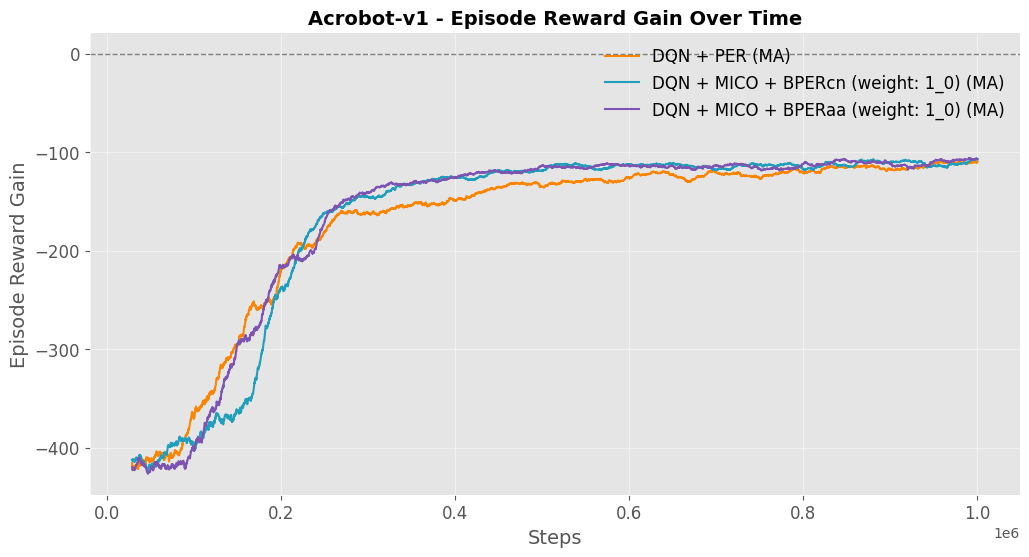

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns  # Seaborn can help with style
import pandas as pd

plt.style.use('ggplot')


def plot_episode_reward_window(data, window_size = 200):

    # Sample data for plotting
    # Assuming 'data' is already a DataFrame with the required columns
    data['DQN + PER MA'] = data['DQN + PER'].rolling(window=window_size).mean()
    data['DQN + MICO + BPERcn (weight: 1_0) MA'] = data['DQN + MICO + BPERcn (weight: 1_0)'].rolling(window=window_size).mean()
    data['DQN + MICO + BPERaa (weight: 1_0) MA'] = data['DQN + MICO + BPERaa (weight: 1_0)'].rolling(window=window_size).mean()

    # Plot with W&B style
    plt.figure(figsize=(12, 6))

    # Plot the original data
    plt.plot(data['steps'], data['DQN + PER MA'], label='DQN + PER (MA)', color='#FB8500')
    plt.plot(data['steps'], data['DQN + MICO + BPERcn (weight: 1_0) MA'], label='DQN + MICO + BPERcn (weight: 1_0) (MA)', color='#219EBC')
    plt.plot(data['steps'], data['DQN + MICO + BPERaa (weight: 1_0) MA'], label='DQN + MICO + BPERaa (weight: 1_0) (MA)', color='#7D54B2')

    # Add a small dashed line at y = 0
    plt.axhline(y=0, color='gray', linestyle='--', linewidth=1)

    # Title and labels with a clean font
    plt.title('Acrobot-v1 - Episode Reward Gain Over Time', fontsize=14, weight='bold')
    plt.xlabel('Steps', fontsize=14)
    plt.ylabel('Episode Reward Gain', fontsize=14)

    # Adjust the legend to match W&B style
    plt.legend(loc='upper right', fontsize=12, frameon=False)

    # Light gridlines
    plt.grid(True, linestyle='-', linewidth=0.5, alpha=0.7)

    # Tweak spines to make them less prominent
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['left'].set_linewidth(0.5)
    plt.gca().spines['bottom'].set_linewidth(0.5)

    # Set consistent font across all elements
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)


    # DQN: -100
    # DQN + PER: -150
    # DQN + MICO + BPERcn (weight: 1_0): -50

    # Show plot
    plt.show()

plot_episode_reward_window(data, window_size = 200)

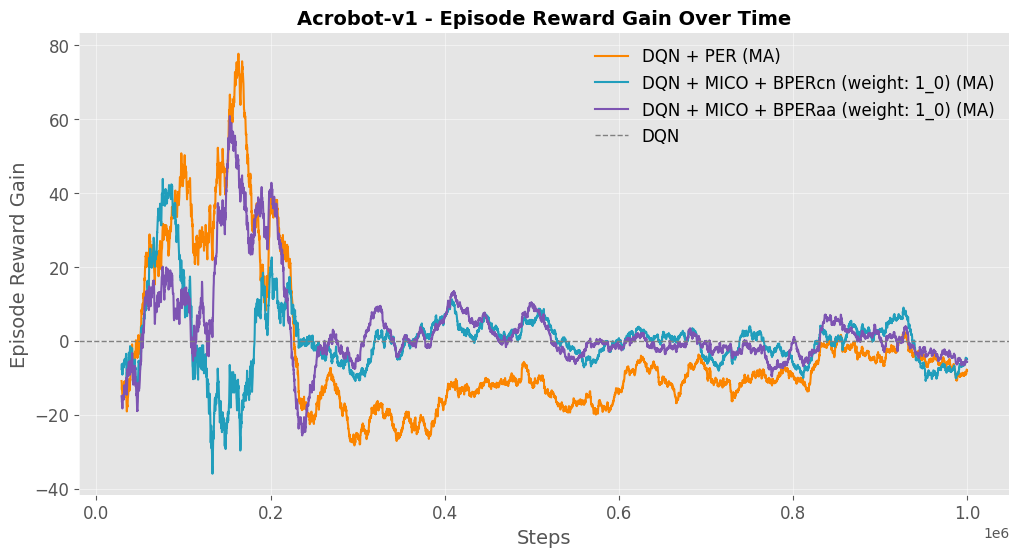

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns  # Seaborn can help with style
import pandas as pd

plt.style.use('ggplot')


def plot_episode_reward_gain(data, window_size = 200, loc_legend='upper right', envname = 'Acrobot-v1'):

    data = data.copy()
    
    # Use the DQN as a baseline and measure the area under the curve. Rest the are under the curve of the DQN
    data['DQN + PER'] = data['DQN + PER'] - data['DQN']
    data['DQN + MICO + BPERcn (weight: 1_0)'] = data['DQN + MICO + BPERcn (weight: 1_0)'] - data['DQN']
    data['DQN + MICO + BPERaa (weight: 1_0)'] = data['DQN + MICO + BPERaa (weight: 1_0)'] - data['DQN']
    
    # Sample data for plotting
    # Assuming 'data' is already a DataFrame with the required columns
    data['DQN + PER MA'] = data['DQN + PER'].rolling(window=window_size).mean()
    data['DQN + MICO + BPERcn (weight: 1_0) MA'] = data['DQN + MICO + BPERcn (weight: 1_0)'].rolling(window=window_size).mean()
    data['DQN + MICO + BPERaa (weight: 1_0) MA'] = data['DQN + MICO + BPERaa (weight: 1_0)'].rolling(window=window_size).mean()

    # Plot with W&B style
    plt.figure(figsize=(12, 6))

    # Plot the original data
    plt.plot(data['steps'], data['DQN + PER MA'], label='DQN + PER (MA)', color='#FB8500')
    plt.plot(data['steps'], data['DQN + MICO + BPERcn (weight: 1_0) MA'], label='DQN + MICO + BPERcn (weight: 1_0) (MA)', color='#219EBC')
    plt.plot(data['steps'], data['DQN + MICO + BPERaa (weight: 1_0) MA'], label='DQN + MICO + BPERaa (weight: 1_0) (MA)', color='#7D54B2')

    # Add a small dashed line at y = 0
    plt.axhline(y=0, color='gray', linestyle='--', linewidth=1, label='DQN')

    # Title and labels with a clean font
    plt.title(f'{envname} - Episode Reward Gain Over Time', fontsize=14, weight='bold')
    plt.xlabel('Steps', fontsize=14)
    plt.ylabel('Episode Reward Gain', fontsize=14)

    # Adjust the legend to match W&B style
    plt.legend(loc=loc_legend, fontsize=12, frameon=False)

    # Light gridlines
    plt.grid(True, linestyle='-', linewidth=0.5, alpha=0.7)

    # Tweak spines to make them less prominent
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['left'].set_linewidth(0.5)
    plt.gca().spines['bottom'].set_linewidth(0.5)

    # Set consistent font across all elements
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)


    # DQN: -100
    # DQN + PER: -150
    # DQN + MICO + BPERcn (weight: 1_0): -50 

    # DQN: 100
    # DQN + PER: 50
    # DQN + MICO + BPERcn (weight: 1_0): 150 
   

    # Show plot
    plt.show()

plot_episode_reward_gain(data, window_size = 200)#, negative_rewards = True)

In [76]:
data = pd.read_csv('cart_pole_v0_expected_rewards.csv')
data.head()

,Step,"buffer: {'buffer_size': 100000, 'batch_size': 256, 'scratch_dir': None, 'prioritized_replay': True, 'alpha': 0.6, 'beta': 0.4, 'mico_priority': {'priority_type': 'current_vs_next', 'priority_weight': 1.0, 'normalize_priorities': True}} - train/episode_reward","buffer: {'buffer_size': 100000, 'batch_size': 256, 'scratch_dir': None, 'prioritized_replay': True, 'alpha': 0.6, 'beta': 0.4, 'mico_priority': {'priority_type': 'current_vs_next', 'priority_weight': 1.0, 'normalize_priorities': True}} - train/episode_reward__MIN","buffer: {'buffer_size': 100000, 'batch_size': 256, 'scratch_dir': None, 'prioritized_replay': True, 'alpha': 0.6, 'beta': 0.4, 'mico_priority': {'priority_type': 'current_vs_next', 'priority_weight': 1.0, 'normalize_priorities': True}} - train/episode_reward__MAX","buffer: {'buffer_size': 100000, 'batch_size': 256, 'scratch_dir': None, 'prioritized_replay': True, 'alpha': 0.6, 'beta': 0.4} - train/episode_reward","buffer: {'buffer_size': 100000, 'batch_size': 256, 'scratch_dir': None, 'prioritized_replay': True, 'alpha': 0.6, 'beta': 0.4} - train/episode_reward__MIN","buffer: {'buffer_size': 100000, 'batch_size': 256, 'scratch_dir': None, 'prioritized_replay': True, 'alpha': 0.6, 'beta': 0.4} - train/episode_reward__MAX","buffer: {'buffer_size': 100000, 'batch_size': 256, 'scratch_dir': None, 'prioritized_replay': False, 'alpha': 0.6, 'beta': 0.4} - train/episode_reward","buffer: {'buffer_size': 100000, 'batch_size': 256, 'scratch_dir': None, 'prioritized_replay': False, 'alpha': 0.6, 'beta': 0.4} - train/episode_reward__MIN","buffer: {'buffer_size': 100000, 'batch_size': 256, 'scratch_dir': None, 'prioritized_replay': False, 'alpha': 0.6, 'beta': 0.4} - train/episode_reward__MAX","buffer: {'buffer_size': 100000, 'batch_size': 256, 'scratch_dir': None, 'prioritized_replay': True, 'alpha': 0.6, 'beta': 0.4, 'mico_priority': {'priority_type': 'all_vs_all', 'priority_weight': 1.0, 'normalize_priorities': True}} - train/episode_reward","buffer: {'buffer_size': 100000, 'batch_size': 256, 'scratch_dir': None, 'prioritized_replay': True, 'alpha': 0.6, 'beta': 0.4, 'mico_priority': {'priority_type': 'all_vs_all', 'priority_weight': 1.0, 'normalize_priorities': True}} - train/episode_reward__MIN","buffer: {'buffer_size': 100000, 'batch_size': 256, 'scratch_dir': None, 'prioritized_replay': True, 'alpha': 0.6, 'beta': 0.4, 'mico_priority': {'priority_type': 'all_vs_all', 'priority_weight': 1.0, 'normalize_priorities': True}} - train/episode_reward__MAX"
0,128,16.285715,16.000,16.714287,18.613096,12.625000,28.500000,18.613096,12.625000,28.500000,16.285715,16.000,16.714287
1,256,13.279762,11.000,14.714287,14.351852,13.555555,14.875000,14.351852,13.555555,14.875000,13.279762,11.000,14.714287
2,384,18.455556,13.500,21.666668,14.095239,12.000000,16.142859,14.095239,12.000000,16.142859,18.455556,13.500,21.666668
3,512,21.658333,15.375,25.000000,14.500000,10.400001,22.000000,14.500000,10.400001,22.000000,21.658333,15.375,25.000000
4,640,14.188096,11.100,17.714287,15.458334,11.333333,20.666668,15.458334,11.333333,20.666668,14.188096,11.100,17.714287


In [77]:
# Replace the nan values with the previous value
data = data.ffill()
data = data.bfill()
# Rename the columns
data.columns = ['steps',
    'DQN + MICO + BPERcn (weight: 1_0)', 'DQN + MICO + BPERcn (weight: 1_0) max', 'DQN + MICO + BPERcn (weight: 1_0) min',
    'DQN + PER', 'DQN + PER max', 'DQN + PER min', 
    'DQN', 'DQN max', 'DQN min',
    'DQN + MICO + BPERaa (weight: 1_0)', 'DQN + MICO + BPERaa (weight: 1_0) max', 'DQN + MICO + BPERaa (weight: 1_0) min',
]
data.head()

,steps,DQN + MICO + BPERcn (weight: 1_0),DQN + MICO + BPERcn (weight: 1_0) max,DQN + MICO + BPERcn (weight: 1_0) min,DQN + PER,DQN + PER max,DQN + PER min,DQN,DQN max,DQN min,DQN + MICO + BPERaa (weight: 1_0),DQN + MICO + BPERaa (weight: 1_0) max,DQN + MICO + BPERaa (weight: 1_0) min
0,128,16.285715,16.000,16.714287,18.613096,12.625000,28.500000,18.613096,12.625000,28.500000,16.285715,16.000,16.714287
1,256,13.279762,11.000,14.714287,14.351852,13.555555,14.875000,14.351852,13.555555,14.875000,13.279762,11.000,14.714287
2,384,18.455556,13.500,21.666668,14.095239,12.000000,16.142859,14.095239,12.000000,16.142859,18.455556,13.500,21.666668
3,512,21.658333,15.375,25.000000,14.500000,10.400001,22.000000,14.500000,10.400001,22.000000,21.658333,15.375,25.000000
4,640,14.188096,11.100,17.714287,15.458334,11.333333,20.666668,15.458334,11.333333,20.666668,14.188096,11.100,17.714287


In [78]:
data.head()

,steps,DQN + MICO + BPERcn (weight: 1_0),DQN + MICO + BPERcn (weight: 1_0) max,DQN + MICO + BPERcn (weight: 1_0) min,DQN + PER,DQN + PER max,DQN + PER min,DQN,DQN max,DQN min,DQN + MICO + BPERaa (weight: 1_0),DQN + MICO + BPERaa (weight: 1_0) max,DQN + MICO + BPERaa (weight: 1_0) min
0,128,16.285715,16.000,16.714287,18.613096,12.625000,28.500000,18.613096,12.625000,28.500000,16.285715,16.000,16.714287
1,256,13.279762,11.000,14.714287,14.351852,13.555555,14.875000,14.351852,13.555555,14.875000,13.279762,11.000,14.714287
2,384,18.455556,13.500,21.666668,14.095239,12.000000,16.142859,14.095239,12.000000,16.142859,18.455556,13.500,21.666668
3,512,21.658333,15.375,25.000000,14.500000,10.400001,22.000000,14.500000,10.400001,22.000000,21.658333,15.375,25.000000
4,640,14.188096,11.100,17.714287,15.458334,11.333333,20.666668,15.458334,11.333333,20.666668,14.188096,11.100,17.714287


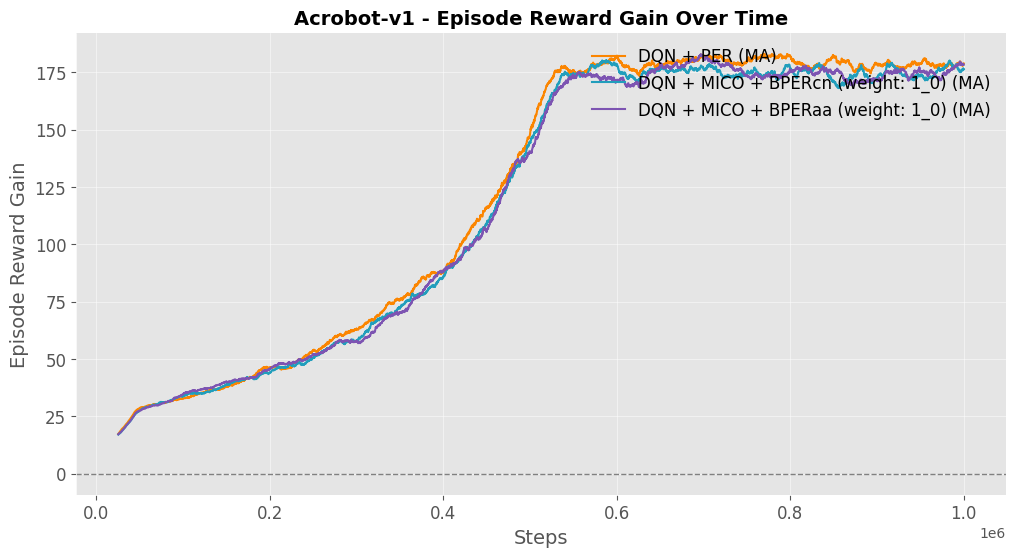

In [79]:
plot_episode_reward_window(data, window_size = 200)

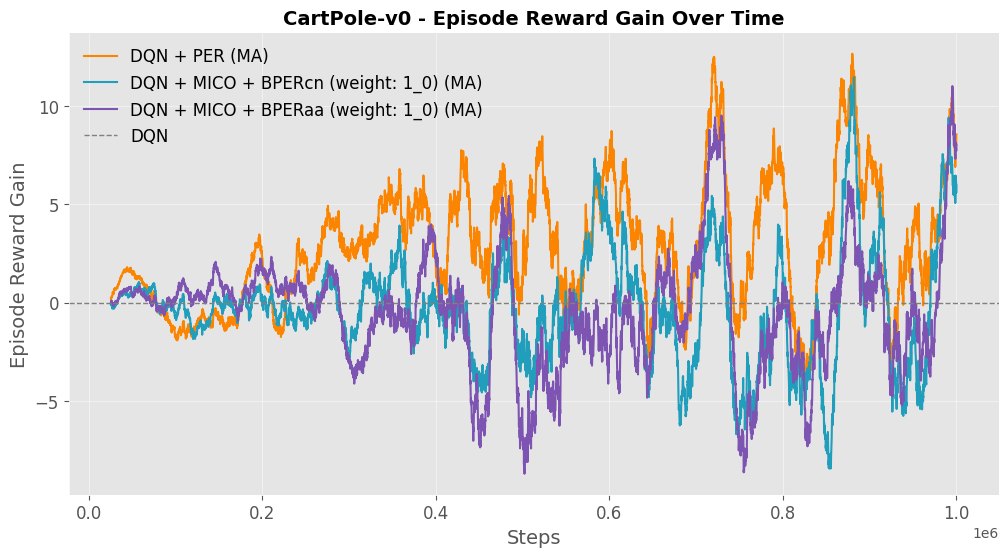

In [80]:
plot_episode_reward_gain(data, window_size = 200, loc_legend='upper left',  envname = 'CartPole-v0')

In [81]:
data = pd.read_csv('lunar_lander_v2_expected_rewards.csv')
data.head()

,Step,"buffer: {'buffer_size': 100000, 'batch_size': 256, 'scratch_dir': None, 'prioritized_replay': True, 'alpha': 0.6, 'beta': 0.4} - train/episode_reward","buffer: {'buffer_size': 100000, 'batch_size': 256, 'scratch_dir': None, 'prioritized_replay': True, 'alpha': 0.6, 'beta': 0.4} - train/episode_reward__MIN","buffer: {'buffer_size': 100000, 'batch_size': 256, 'scratch_dir': None, 'prioritized_replay': True, 'alpha': 0.6, 'beta': 0.4} - train/episode_reward__MAX","buffer: {'buffer_size': 100000, 'batch_size': 256, 'scratch_dir': None, 'prioritized_replay': False, 'alpha': 0.6, 'beta': 0.4} - train/episode_reward","buffer: {'buffer_size': 100000, 'batch_size': 256, 'scratch_dir': None, 'prioritized_replay': False, 'alpha': 0.6, 'beta': 0.4} - train/episode_reward__MIN","buffer: {'buffer_size': 100000, 'batch_size': 256, 'scratch_dir': None, 'prioritized_replay': False, 'alpha': 0.6, 'beta': 0.4} - train/episode_reward__MAX","buffer: {'buffer_size': 100000, 'batch_size': 256, 'scratch_dir': None, 'prioritized_replay': True, 'alpha': 0.6, 'beta': 0.4, 'mico_priority': {'priority_type': 'current_vs_next', 'priority_weight': 1.0, 'normalize_priorities': True}} - train/episode_reward","buffer: {'buffer_size': 100000, 'batch_size': 256, 'scratch_dir': None, 'prioritized_replay': True, 'alpha': 0.6, 'beta': 0.4, 'mico_priority': {'priority_type': 'current_vs_next', 'priority_weight': 1.0, 'normalize_priorities': True}} - train/episode_reward__MIN","buffer: {'buffer_size': 100000, 'batch_size': 256, 'scratch_dir': None, 'prioritized_replay': True, 'alpha': 0.6, 'beta': 0.4, 'mico_priority': {'priority_type': 'current_vs_next', 'priority_weight': 1.0, 'normalize_priorities': True}} - train/episode_reward__MAX","buffer: {'buffer_size': 100000, 'batch_size': 256, 'scratch_dir': None, 'prioritized_replay': True, 'alpha': 0.6, 'beta': 0.4, 'mico_priority': {'priority_type': 'all_vs_all', 'priority_weight': 1.0, 'normalize_priorities': True}} - train/episode_reward","buffer: {'buffer_size': 100000, 'batch_size': 256, 'scratch_dir': None, 'prioritized_replay': True, 'alpha': 0.6, 'beta': 0.4, 'mico_priority': {'priority_type': 'all_vs_all', 'priority_weight': 1.0, 'normalize_priorities': True}} - train/episode_reward__MIN","buffer: {'buffer_size': 100000, 'batch_size': 256, 'scratch_dir': None, 'prioritized_replay': True, 'alpha': 0.6, 'beta': 0.4, 'mico_priority': {'priority_type': 'all_vs_all', 'priority_weight': 1.0, 'normalize_priorities': True}} - train/episode_reward__MAX"
0,128,-248.288818,-361.446289,-135.131348,-248.288818,-361.446289,-135.131348,-113.714569,-146.264694,-81.164444,-113.714569,-146.264694,-81.164444
1,256,-326.005745,-474.497192,-124.277336,-326.005745,-474.497192,-124.277336,-433.666565,-612.694397,-166.704041,-433.666565,-612.694397,-166.704041
2,384,-318.863007,-500.235107,-224.813293,-318.863007,-500.235107,-224.813293,-332.363958,-459.577087,-232.989273,-332.363958,-459.577087,-232.989273
3,512,-200.789866,-455.382629,-47.612907,-200.789866,-455.382629,-47.612907,-291.114466,-399.171906,-105.452194,-291.114466,-399.171906,-105.452194
4,640,-176.480652,-253.373901,-126.020935,-176.480652,-253.373901,-126.020935,-257.395020,-550.724731,-88.570221,-257.395020,-550.724731,-88.570221


In [82]:
# Replace the nan values with the previous value
data = data.ffill()
data = data.bfill()
# Rename the columns
data.columns = ['steps',
    'DQN + PER', 'DQN + PER max', 'DQN + PER min', 
    'DQN', 'DQN max', 'DQN min',
    'DQN + MICO + BPERcn (weight: 1_0)', 'DQN + MICO + BPERcn (weight: 1_0) max', 'DQN + MICO + BPERcn (weight: 1_0) min',
    'DQN + MICO + BPERaa (weight: 1_0)', 'DQN + MICO + BPERaa (weight: 1_0) max', 'DQN + MICO + BPERaa (weight: 1_0) min',
]
data.head()

,steps,DQN + PER,DQN + PER max,DQN + PER min,DQN,DQN max,DQN min,DQN + MICO + BPERcn (weight: 1_0),DQN + MICO + BPERcn (weight: 1_0) max,DQN + MICO + BPERcn (weight: 1_0) min,DQN + MICO + BPERaa (weight: 1_0),DQN + MICO + BPERaa (weight: 1_0) max,DQN + MICO + BPERaa (weight: 1_0) min
0,128,-248.288818,-361.446289,-135.131348,-248.288818,-361.446289,-135.131348,-113.714569,-146.264694,-81.164444,-113.714569,-146.264694,-81.164444
1,256,-326.005745,-474.497192,-124.277336,-326.005745,-474.497192,-124.277336,-433.666565,-612.694397,-166.704041,-433.666565,-612.694397,-166.704041
2,384,-318.863007,-500.235107,-224.813293,-318.863007,-500.235107,-224.813293,-332.363958,-459.577087,-232.989273,-332.363958,-459.577087,-232.989273
3,512,-200.789866,-455.382629,-47.612907,-200.789866,-455.382629,-47.612907,-291.114466,-399.171906,-105.452194,-291.114466,-399.171906,-105.452194
4,640,-176.480652,-253.373901,-126.020935,-176.480652,-253.373901,-126.020935,-257.395020,-550.724731,-88.570221,-257.395020,-550.724731,-88.570221


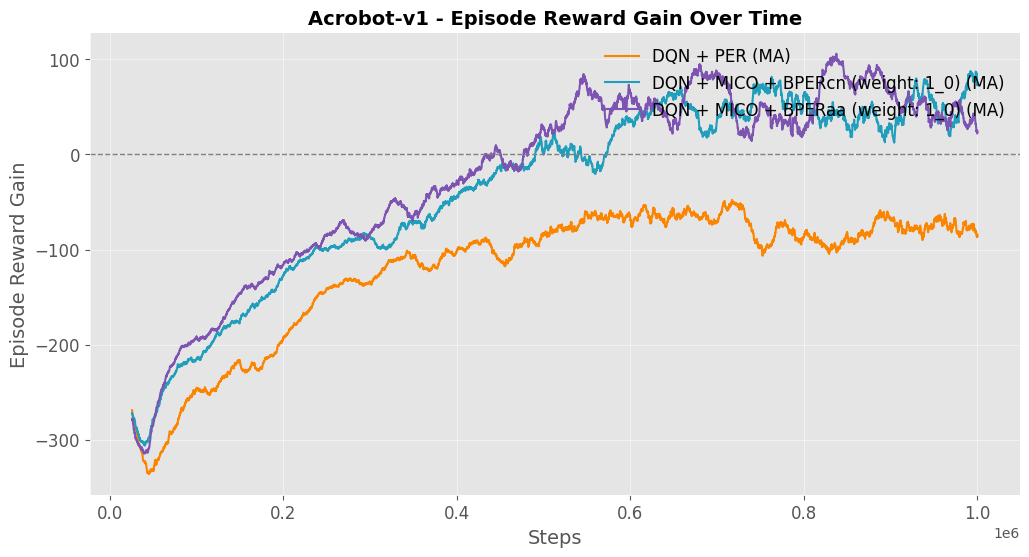

In [83]:
plot_episode_reward_window(data, window_size = 200)

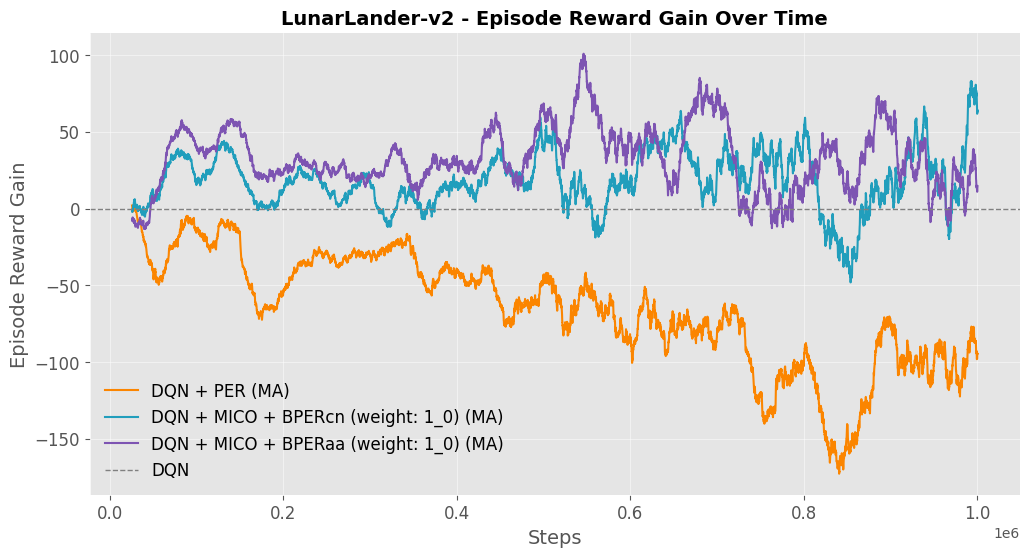

In [84]:
plot_episode_reward_gain(data, window_size = 200, loc_legend='lower left',  envname = 'LunarLander-v2')

In [85]:
data = pd.read_csv('mountain_car_v0_expected_rewards.csv')
data.head()


,Step,"buffer: {'buffer_size': 100000, 'batch_size': 256, 'scratch_dir': None, 'prioritized_replay': True, 'alpha': 0.6, 'beta': 0.4} - train/episode_reward","buffer: {'buffer_size': 100000, 'batch_size': 256, 'scratch_dir': None, 'prioritized_replay': True, 'alpha': 0.6, 'beta': 0.4} - train/episode_reward__MIN","buffer: {'buffer_size': 100000, 'batch_size': 256, 'scratch_dir': None, 'prioritized_replay': True, 'alpha': 0.6, 'beta': 0.4} - train/episode_reward__MAX","buffer: {'buffer_size': 100000, 'batch_size': 256, 'scratch_dir': None, 'prioritized_replay': False, 'alpha': 0.6, 'beta': 0.4} - train/episode_reward","buffer: {'buffer_size': 100000, 'batch_size': 256, 'scratch_dir': None, 'prioritized_replay': False, 'alpha': 0.6, 'beta': 0.4} - train/episode_reward__MIN","buffer: {'buffer_size': 100000, 'batch_size': 256, 'scratch_dir': None, 'prioritized_replay': False, 'alpha': 0.6, 'beta': 0.4} - train/episode_reward__MAX","buffer: {'buffer_size': 100000, 'batch_size': 256, 'scratch_dir': None, 'prioritized_replay': True, 'alpha': 0.6, 'beta': 0.4, 'mico_priority': {'priority_type': 'current_vs_next', 'priority_weight': 1.0, 'normalize_priorities': True}} - train/episode_reward","buffer: {'buffer_size': 100000, 'batch_size': 256, 'scratch_dir': None, 'prioritized_replay': True, 'alpha': 0.6, 'beta': 0.4, 'mico_priority': {'priority_type': 'current_vs_next', 'priority_weight': 1.0, 'normalize_priorities': True}} - train/episode_reward__MIN","buffer: {'buffer_size': 100000, 'batch_size': 256, 'scratch_dir': None, 'prioritized_replay': True, 'alpha': 0.6, 'beta': 0.4, 'mico_priority': {'priority_type': 'current_vs_next', 'priority_weight': 1.0, 'normalize_priorities': True}} - train/episode_reward__MAX","buffer: {'buffer_size': 100000, 'batch_size': 256, 'scratch_dir': None, 'prioritized_replay': True, 'alpha': 0.6, 'beta': 0.4, 'mico_priority': {'priority_type': 'all_vs_all', 'priority_weight': 1.0, 'normalize_priorities': True}} - train/episode_reward","buffer: {'buffer_size': 100000, 'batch_size': 256, 'scratch_dir': None, 'prioritized_replay': True, 'alpha': 0.6, 'beta': 0.4, 'mico_priority': {'priority_type': 'all_vs_all', 'priority_weight': 1.0, 'normalize_priorities': True}} - train/episode_reward__MIN","buffer: {'buffer_size': 100000, 'batch_size': 256, 'scratch_dir': None, 'prioritized_replay': True, 'alpha': 0.6, 'beta': 0.4, 'mico_priority': {'priority_type': 'all_vs_all', 'priority_weight': 1.0, 'normalize_priorities': True}} - train/episode_reward__MAX"
0,256,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0
1,512,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0
2,640,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0
3,896,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0
4,1024,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0


In [86]:
data = data.ffill()
data = data.bfill()

data.columns = ['steps',
    'DQN + PER', 'DQN + PER max', 'DQN + PER min', 
    'DQN', 'DQN max', 'DQN min',
    'DQN + MICO + BPERcn (weight: 1_0)', 'DQN + MICO + BPERcn (weight: 1_0) max', 'DQN + MICO + BPERcn (weight: 1_0) min',
    'DQN + MICO + BPERaa (weight: 1_0)', 'DQN + MICO + BPERaa (weight: 1_0) max', 'DQN + MICO + BPERaa (weight: 1_0) min',
]

data.head()

,steps,DQN + PER,DQN + PER max,DQN + PER min,DQN,DQN max,DQN min,DQN + MICO + BPERcn (weight: 1_0),DQN + MICO + BPERcn (weight: 1_0) max,DQN + MICO + BPERcn (weight: 1_0) min,DQN + MICO + BPERaa (weight: 1_0),DQN + MICO + BPERaa (weight: 1_0) max,DQN + MICO + BPERaa (weight: 1_0) min
0,256,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0
1,512,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0
2,640,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0
3,896,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0
4,1024,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0


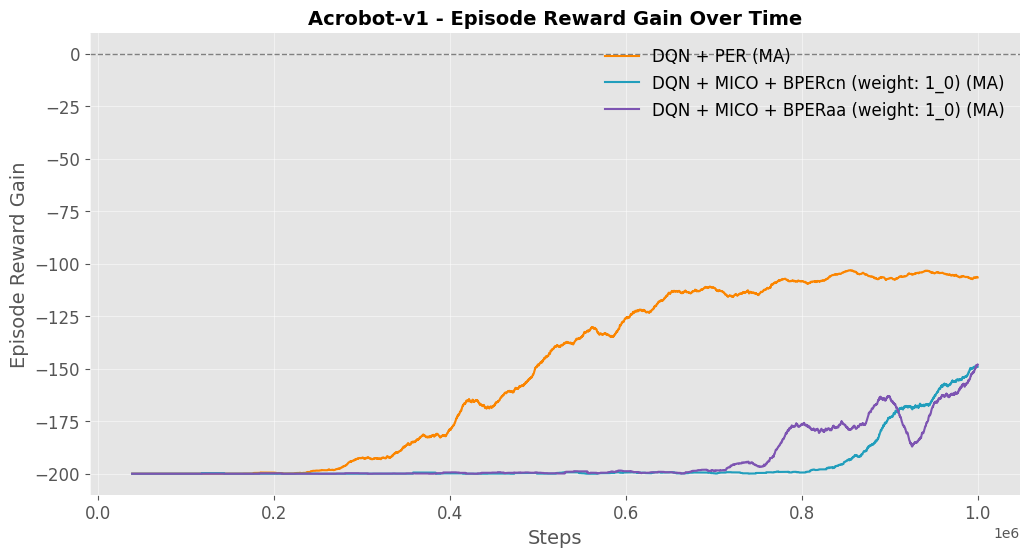

In [87]:
plot_episode_reward_window(data, window_size = 200)

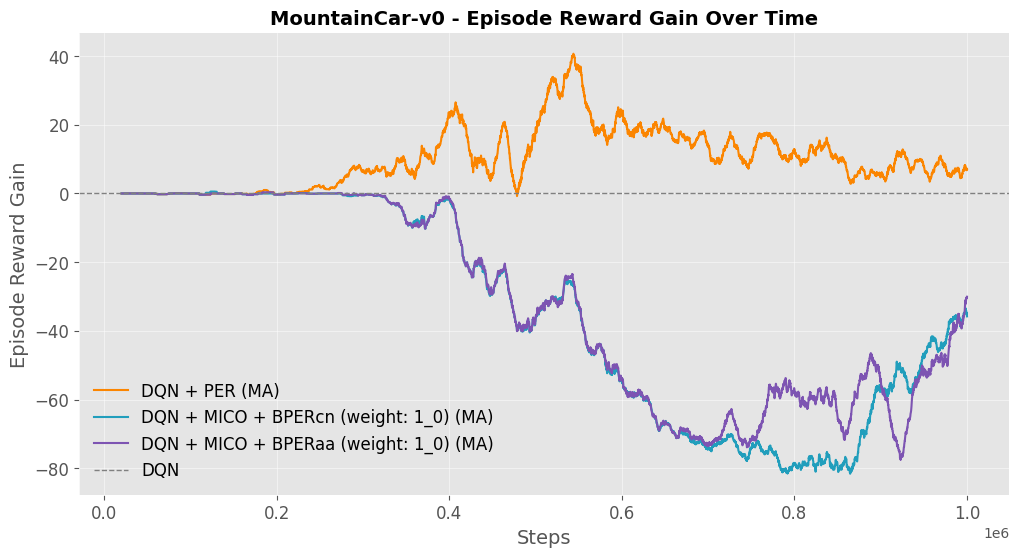

In [92]:
plot_episode_reward_gain(data, window_size = 100, loc_legend='lower left',  envname = 'MountainCar-v0')

# Plot Exploration matrices

In [1]:
!ls

acrobot_v1_cum_reward.csv	   lunar_lander_v2_expected_rewards.csv
acrobot_v1_expected_reward.csv	   mountain_car_v0_expected_rewards.csv
cart_pole_v0_expected_rewards.csv  ploting_result.ipynb


In [7]:
sorted(files)

['visiting_count_grid_world2_frame_10240.pt',
 'visiting_count_grid_world2_frame_20224.pt',
 'visiting_count_grid_world2_frame_30208.pt',
 'visiting_count_grid_world2_frame_40192.pt',
 'visiting_count_grid_world2_frame_50176.pt',
 'visiting_count_grid_world2_frame_60160.pt',
 'visiting_count_grid_world2_frame_70144.pt',
 'visiting_count_grid_world2_frame_80128.pt',
 'visiting_count_grid_world2_frame_90240.pt']

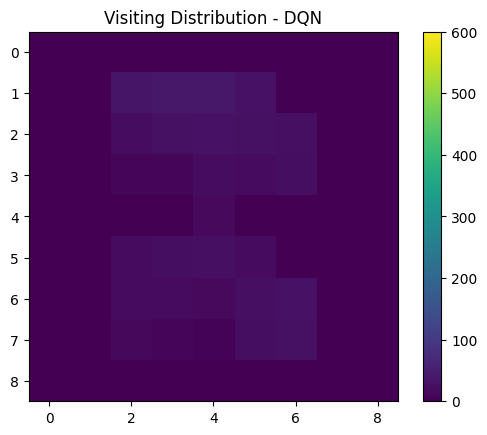

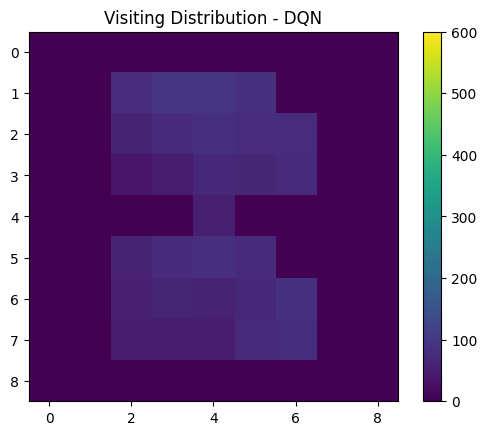

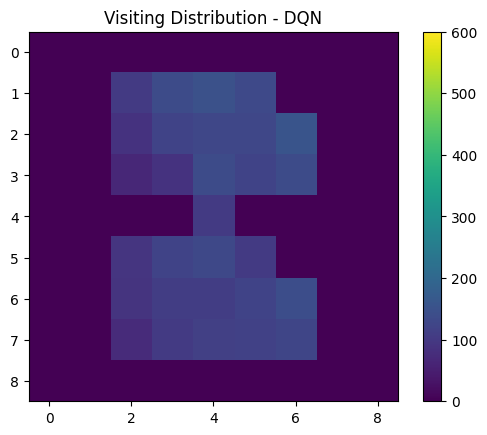

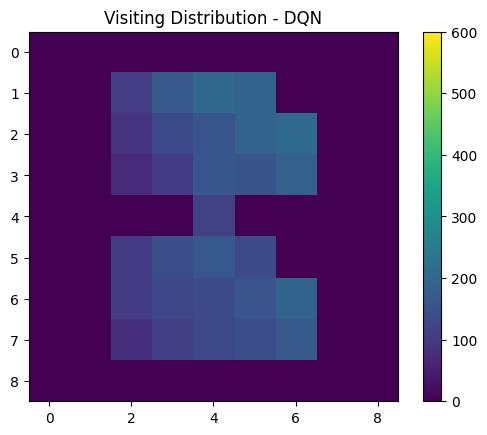

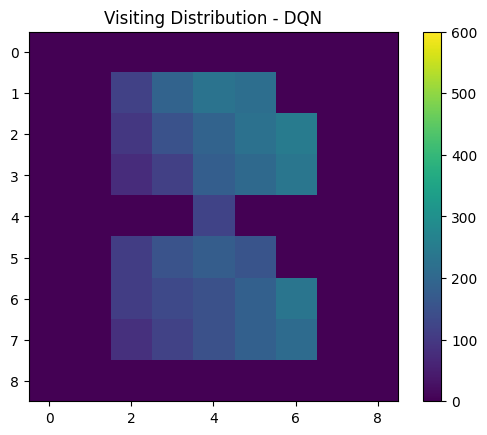

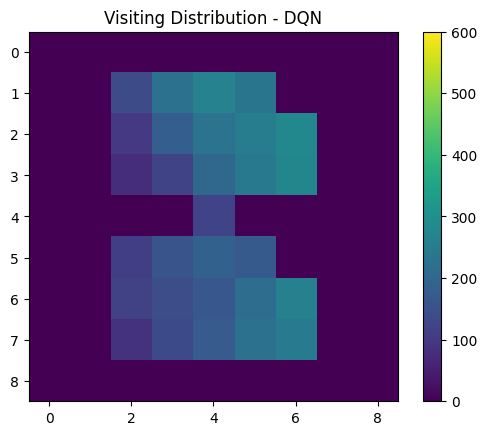

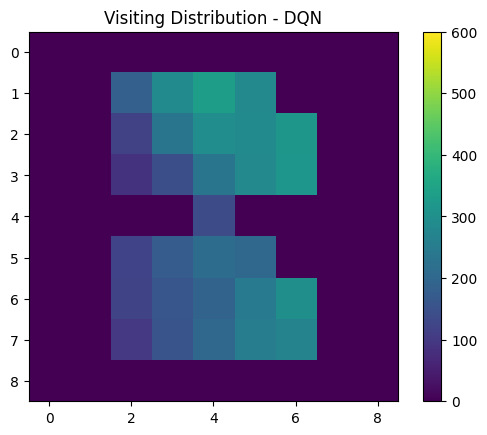

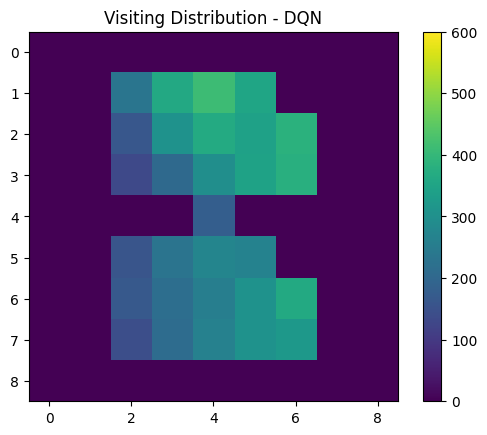

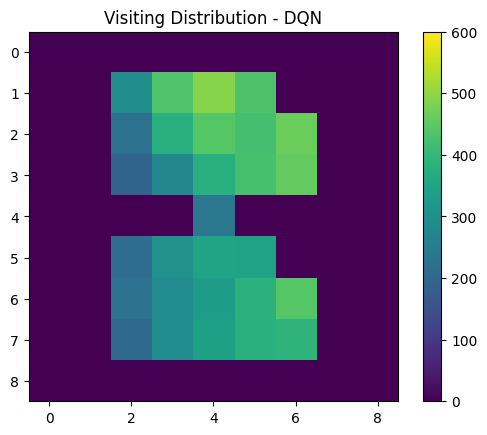

In [22]:
import torch
import matplotlib.pyplot as plt
import os

# Folder path
folderpath = "../dqn_gridworld/results/DQN_pixels_baseline_seed_118398_grid_world2"

def plot_heatmaps(folderpath, title="DQN", heatmap_range = None):

    if heatmap_range:
        vmin, vmax = heatmap_range

    # Get the list of files in the folder and save in a variable
    files = sorted(os.listdir(folderpath))

    # Plot all the .pt files in the folder
    for file_name in files:
        # Load the .pt file
        filepath = f"{folderpath}/{file_name}"
        matrix = torch.load(filepath).cpu().numpy()

        # set the title
        plt.title("Visiting Distribution" + " - " + title)

        # Plot the heatmap
        if heatmap_range:
            plt.imshow(matrix, cmap='viridis',  vmin=vmin, vmax=vmax)
        else:
            plt.imshow(matrix, cmap='viridis')
        plt.colorbar()
        plt.show()


plot_heatmaps(folderpath, title="DQN", heatmap_range = (0,600))

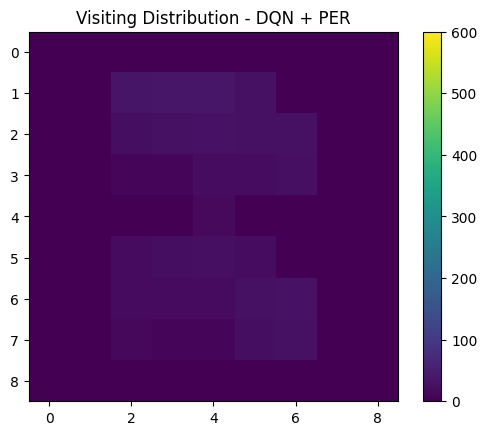

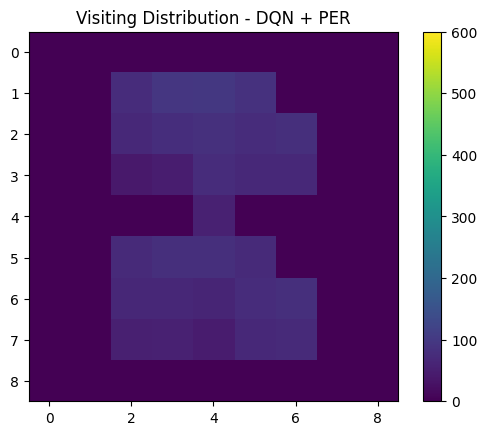

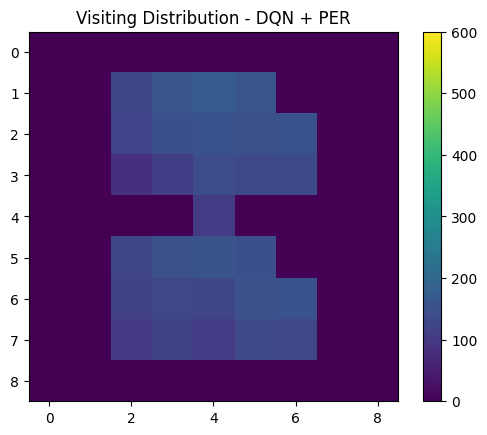

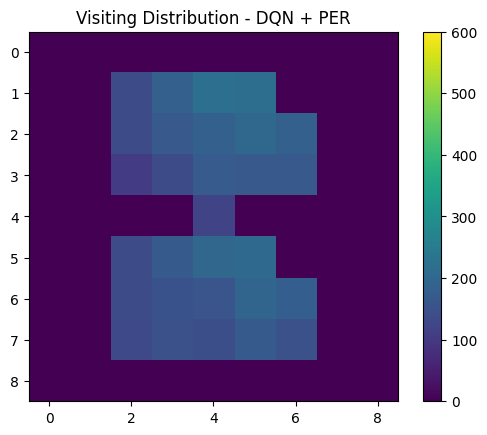

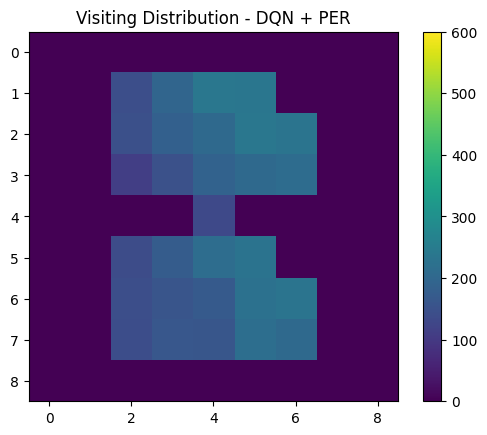

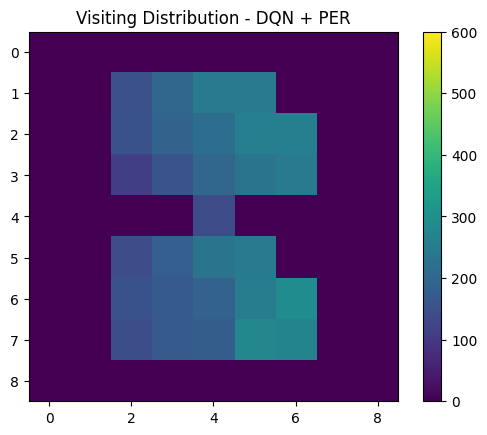

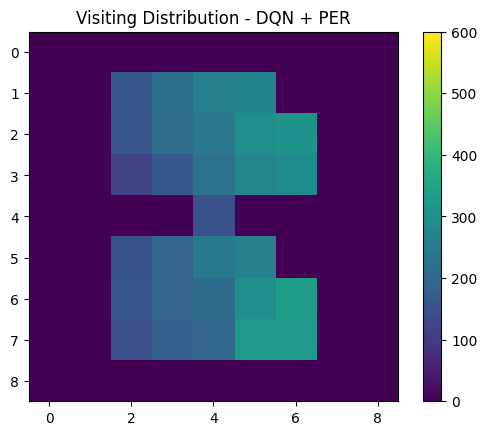

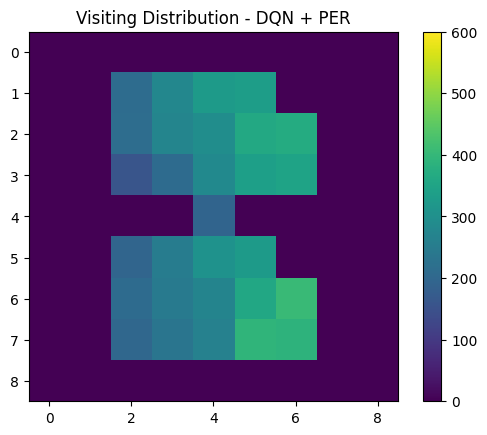

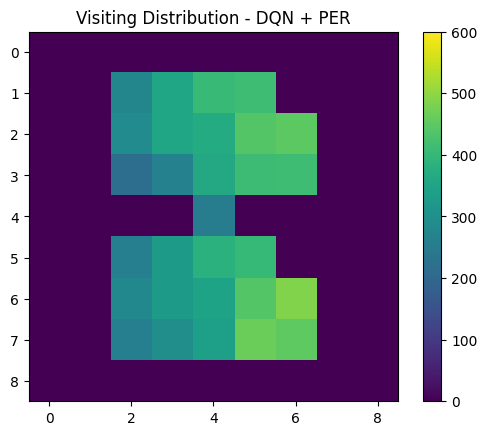

In [23]:
import torch
import matplotlib.pyplot as plt
import os

# Folder path
folderpath = "../dqn_gridworld/results/DQN_pixels_PER_seed_118398_grid_world2"

plot_heatmaps(folderpath, title="DQN + PER", heatmap_range = (0,600))

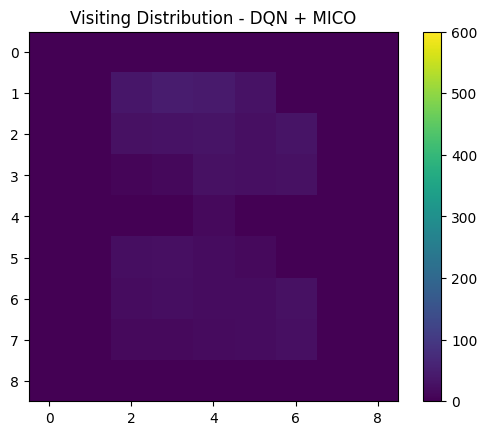

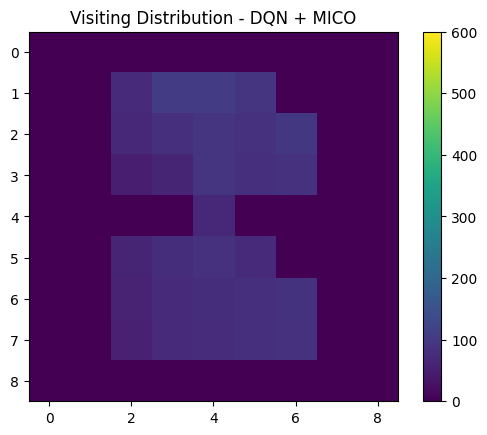

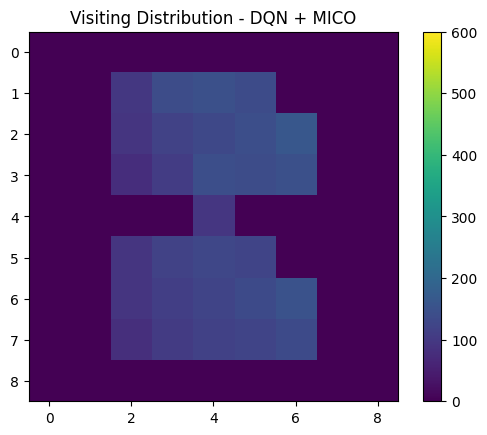

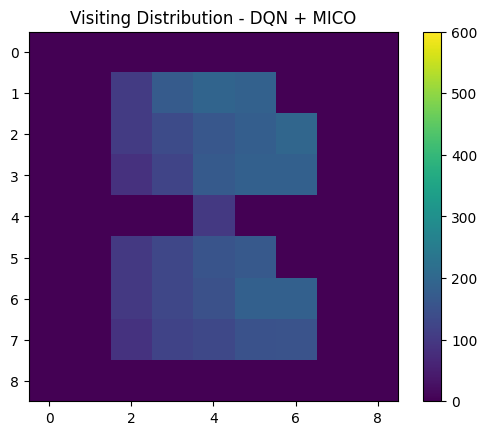

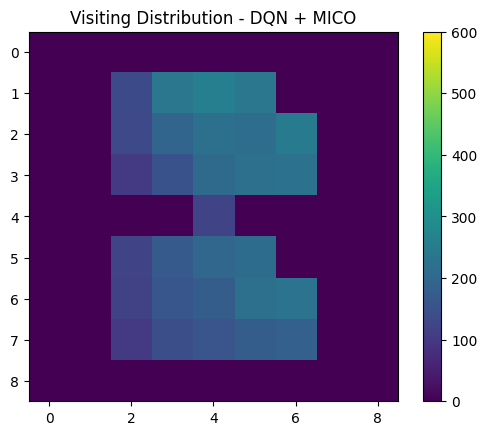

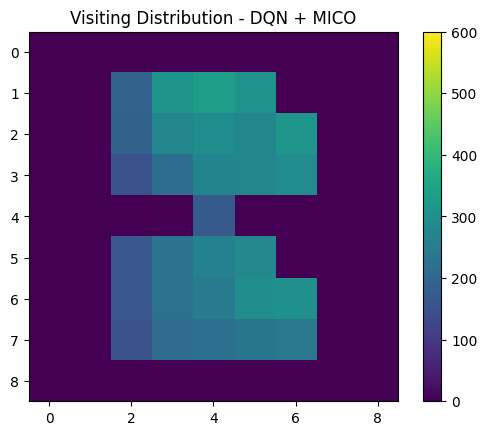

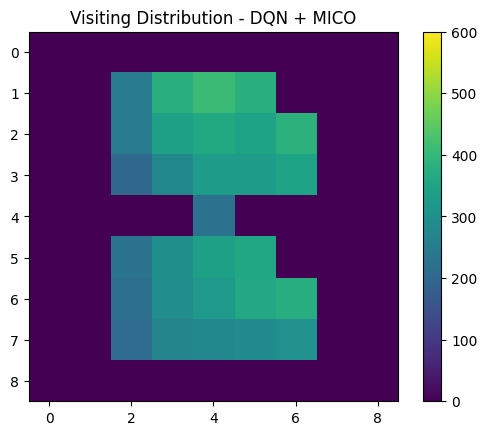

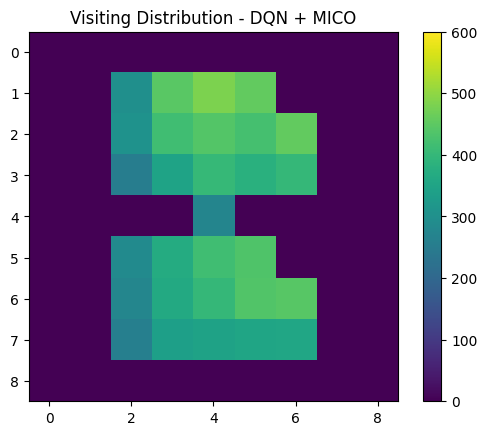

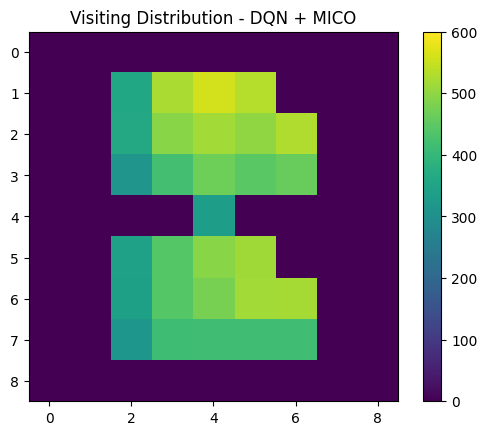

In [24]:
folderpath = "../dqn_gridworld/results/DQN_pixels_MICO_seed_118398_grid_world2"

plot_heatmaps(folderpath, title="DQN + MICO", heatmap_range = (0,600))

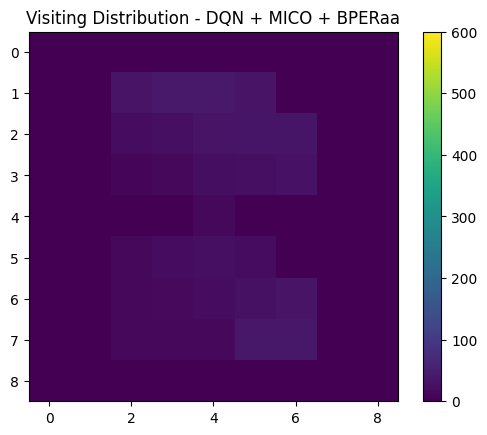

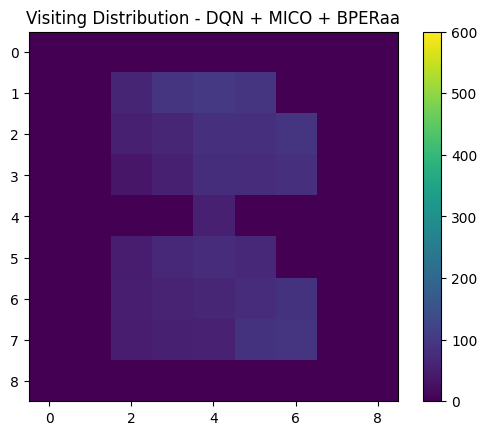

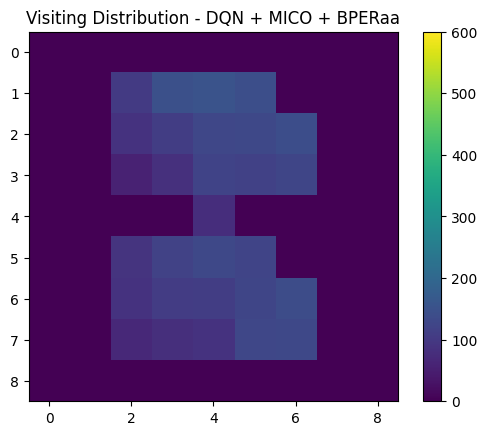

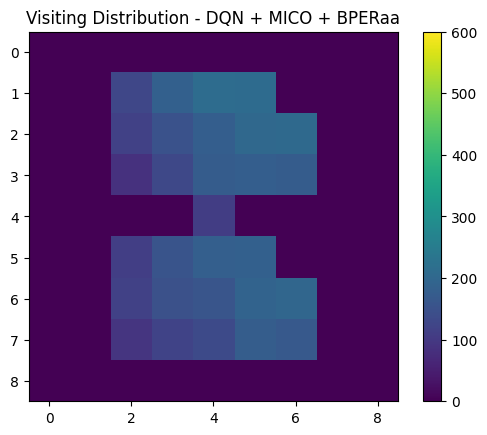

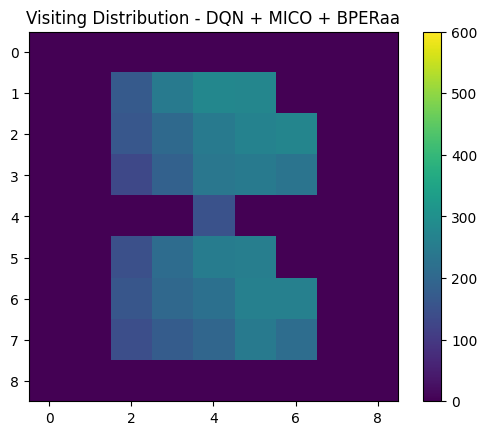

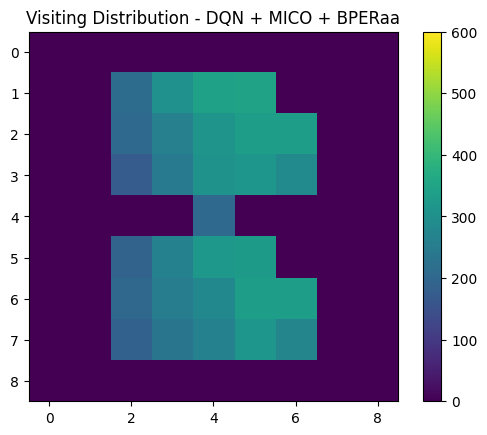

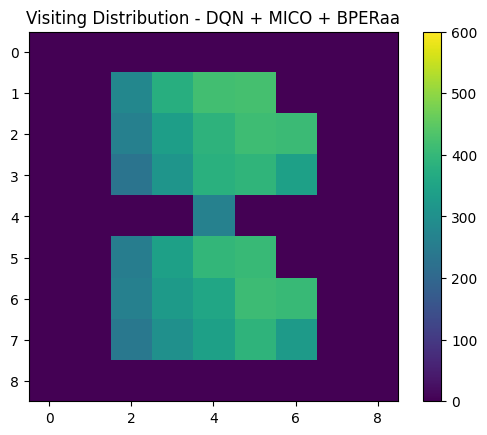

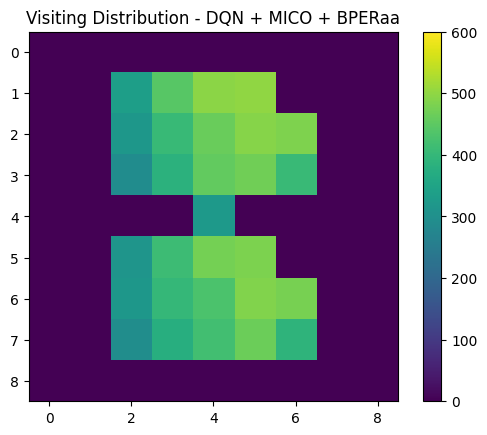

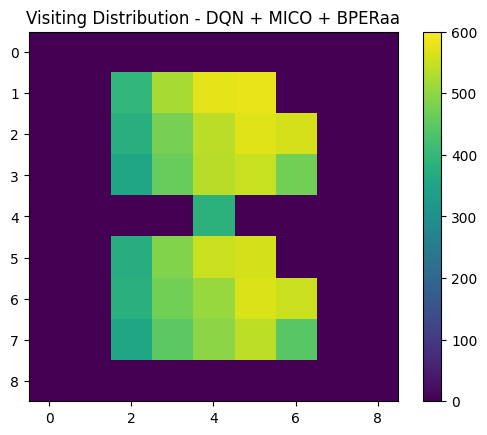

In [25]:
folderpath = "../dqn_gridworld/results/DQN_pixels_BPERaa_MICO_seed_118398_grid_world2"

plot_heatmaps(folderpath, title="DQN + MICO + BPERaa", heatmap_range = (0,600))

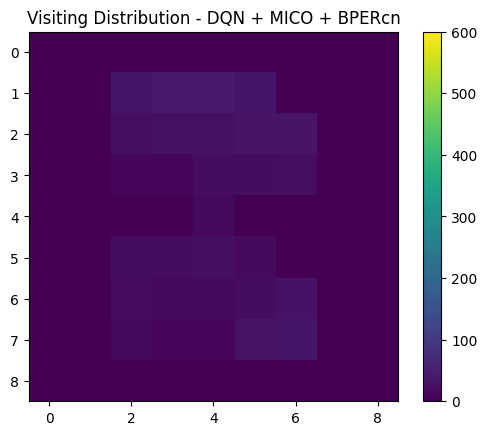

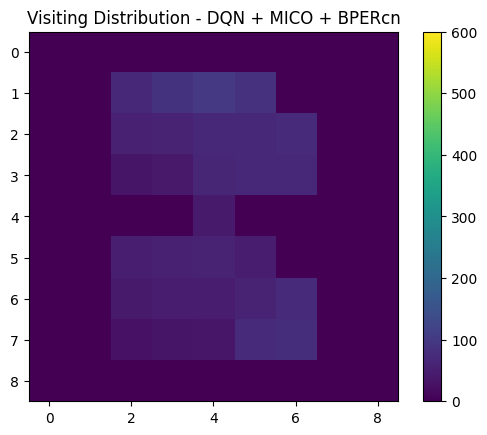

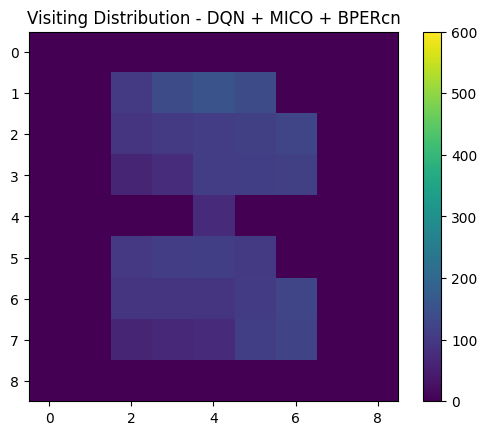

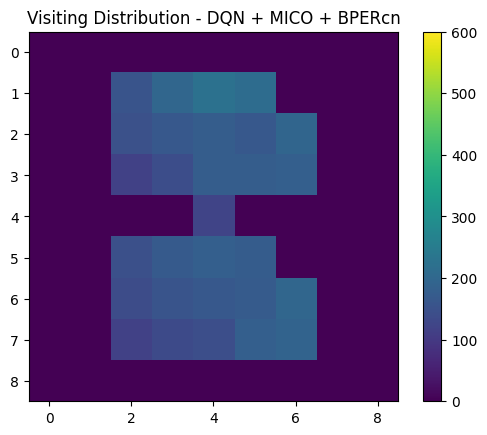

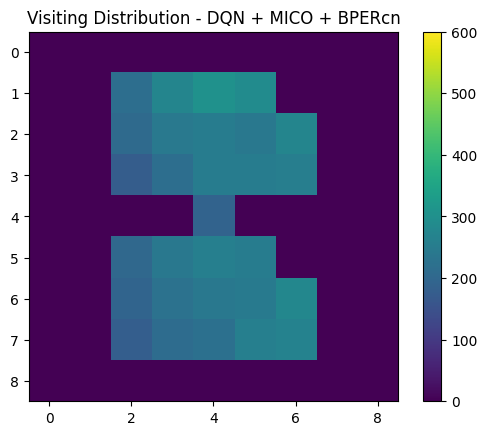

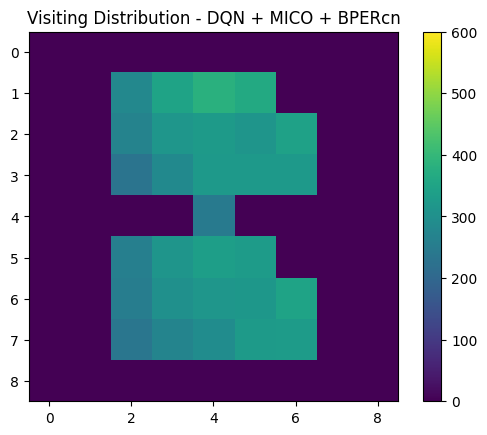

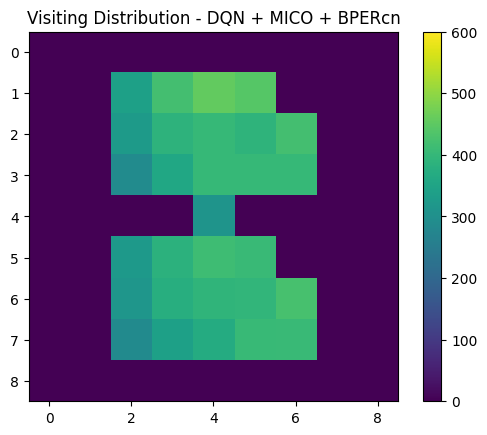

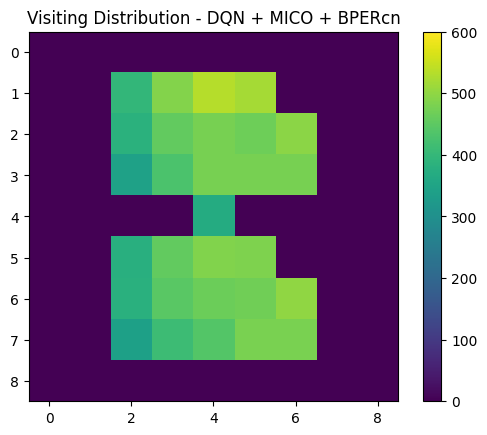

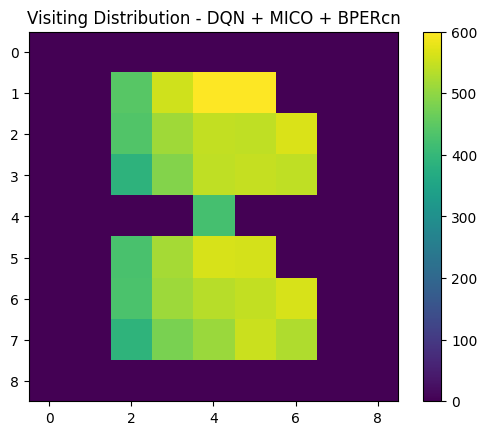

In [26]:
folderpath = "../dqn_gridworld/results/DQN_pixels_BPERcn_MICO_seed_118398_grid_world2"

plot_heatmaps(folderpath, title="DQN + MICO + BPERcn", heatmap_range = (0,600))